# Neural Networks

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 5

$\newcommand{\trace}[1]{\operatorname{tr}\left\{#1\right\}}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\inner}[2]{\langle #1, #2 \rangle}$
$\newcommand{\DD}{\mathscr{D}}$
$\newcommand{\grad}[1]{\operatorname{grad}#1}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## The data set

We will use an old dataset on the price of housing in Boston (see [description](https://archive.ics.uci.edu/ml/datasets/Housing)). The aim is to predict the median value of the owner occupied homes from various other factors. This is the same data as was used in Tutorial 2. However, this time we will explore data normalisation, and hence use the raw data instead. Please download this from [mldata.org](http://mldata.org/repository/data/download/csv/regression-datasets-housing/).

As in Tutorial 2, use ```pandas``` to read the data. Remove the 'CHAS' feature from the dataset. 

In [2]:
names_full =  ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
data_full = np.loadtxt('housing_scale.csv', delimiter=',')
ichas = names_full.index('chas')
data = np.delete(data_full, ichas, axis=1) 
names = names_full
del names[ichas]
data.shape

(506, 13)

Implement a function that will normalise each feature such that the mean value of the feature is zero and the variance is one. Apply this function to each feature in the housing dataset.

In [9]:
# Solution goes here

def normalize(array):
    m = np.mean(array)
    v = np.var(array) # std = np.std(array)
    std = np.std(array)
    return((array-m)/std) # (array-m)/std
    
n_data = data
for name in names:
    n_array = normalize(data[names.index(name)])
    n_data[names.index(name)] = n_array

To simplify equations, we introduce an extra input so that the biases can be absorbed into the weights.

In [10]:
num_ex = n_data.shape[0]
n_data_ones = np.hstack((n_data, np.ones(num_ex).reshape(-1,1)))
names_ones = names + ['one']

## Comparing two normalisations

Compare the normalised data ```n_data``` to the data from Tutorial 2 by plotting and/or comparing histograms. Discuss the potential effect of the normalisation on the regression task.

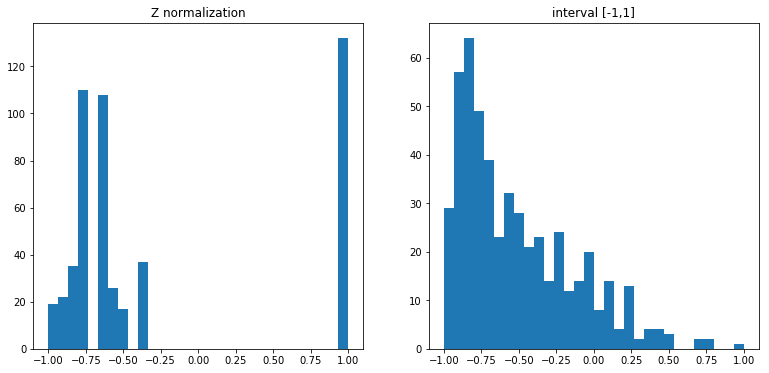

In [11]:
# Solution goes here
data2 = np.loadtxt('housing_scale.csv', delimiter=',')

fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(121)
ax1.hist(n_data_ones[:,names_ones.index('tax')], bins=30)
ax1.set_title('Z normalization')
ax2 = fig.add_subplot(122)
ax2.hist(data2[:,names_ones.index('tax')], bins=30)
ax2.set_title('interval [-1,1]')

## Error Backpropagation

Note that we are considering a regression problem. That is we want to predict the median value of homes (a real number) from the other features. We use the squared error to measure performance.
$$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$$

### Objective function
Write down the objective function of a neural network with one hidden layer. Use the identity activation function for the hidden units. Write down the equation for 5 hidden units.

How many input units should there be? What should be the activation function of the output units? Explain why these choices are reasonable.

### Solution description

$$
y = \sum_{j} w_j^{(2)} (\sum_i w_{ji}^{(1)} x_i) + w_0^{(2)}
$$

$$
= \mathbf{x^Tw^{(1)}w^{(2)}}
$$

(1) 13 input units. Totally twelve features and one unit of bias. (12 , except bias unit).

(2) Identity activation function. Because here we do a regression task, the identity activation function is commonly used there.


### Gradient
Compute the gradient
$\frac{\partial E}{\partial w^{(2)}}$

Because only one unit in the output layer
$$
E = 0.5(y-t)^2
$$

$$
\frac{\partial E}{\partial w_j^{(2)}} = (y-t)\frac{\partial y}{\partial w_j^{(2)}}
$$

$$
\frac{\partial y}{\partial w_j^{(2)}} = \sum_j w_{ji}^{(1)}x_i
$$

$$
\frac{\partial y}{\mathbf{\partial w^{(2)}}} = \mathbf{w^{(1)T} x}
$$

$$
\frac{\partial E}{\partial \mathbf{w^{(2)}}} = (y -t) \mathbf{w^{(1)T} x}
$$


### Solution description



## Checking correctness

One strategy to check that your code is correct in neural networks (and in general any gradient code) is to numerically check that your expression is correct. From the lecture we see that:
$$
\frac{\partial E}{\partial w^{(2)}} \simeq \frac{E(w^{(2)} + \epsilon) - E(w^{(2)} - \epsilon)}{2\epsilon}.
$$
For more information see [the following wiki](http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization).

Implement two functions, one that computes the analytic gradient and the second that computes the numerical gradient.

In [35]:
# Solution goes here
def net(w1,w2,x):
    a1 = x.T.dot(w1)
    z1 = a1
    z1 = np.append(z1,1)
    a2 = z1.dot(w2)
    return(a2)

def error(a,t):
    e = 0.5*np.power(a-t,2)
    return(e)
    
def grad_error(w1,w2,t,x):
    y = net(w1,w2,x)
    a1 = x.T.dot(w1)
    return((y-t)*a1)

def numerical_grad(w1,w2,t,x):
    n = w2.shape[0]
    e = 1e-8
    c = np.diag(e*np.ones(n))
    grads = np.ones(n)
    for i in range(n):
        w2_add = w2[:]+c[:,i]
        w2_min = w2[:]-c[:,i]
        y_add = net(w1,w2_add,x)
        y_min = net(w1,w2_min,x)
        grads[i] = (error(y_add,t)-error(y_min,t))/2/e
    return(grads)

#test
hidden_units = 5
output_units = 1
col_w1 = hidden_units
row_w1 = n_data_ones.shape[1]-1
W1 = np.random.randn(row_w1,col_w1)
W2 = np.random.randn(hidden_units+1)

imedv = names_full.index('medv')
x = np.delete(n_data_ones, -2, axis=1) 
y = n_data_ones[:,-1]

In [36]:
print(W2)
print(net(W1,W2,x[1]))
print(grad_error(W1,W2,y[1],x[1]))
print(numerical_grad(W1,W2,y[1],x[1]))

[ 0.85811393 -1.69943619 -0.14255968  0.35216259 -1.58899455 -0.36722944]
-8.93368641677
[ 47.11617583  -1.01391643  55.70359909 -11.84376831 -34.64730781]
[ 47.11617621  -1.01391642  55.70359889 -11.84376863 -34.64730796
  -9.93368623]


Using the Boston housing data above, confirm that the two functions return almost the same values of the gradient for various values of $w$.

In [ ]:
# Solution goes here

## (optional) Gradients for hidden layer

Derive and implement the gradients for the hidden layer, hence giving you the full two layer neural network. Use this with the experimental set up in Tutorial 2 to analyse the Boston housing data. Recall that since we are using linear activation functions, this is equivalent to using a linear model. Compare and contrast the results of the neural network with regularised linear regression.